**PRÁCTICA 6. WORD EMBEDDINGS, CLASIFICACIÓN Y GENERACIÓN DE TEXTO**

Intro de que a una NN no se le puede pasar texto puesto que solo entiende números. Codificación etiqueta decimal (problemas), one hot encoding (problemas) y word embeddings. Ejercicio word2vec (genism).

Tal y como hemos visto en la parte teórica de la sesión, una **red neuronal** no entiende de otra cosa que no sean **datos numéricos a la entrada**. Esto podría ser crítico para resolver tareas dentro del ámbito del ***Natural Language Processing*** si no fuera por que existen métodos para **mapear palabras/caracteres a números**. En esta primera parte de la práctica veremos que existen métodos más o menos inteligentes para realizar esta acción.

Para romper mano con el texto como dato de entrada, vamos a definir unas muestras de texto. En concreto vamos a crear una lista con varias frases como elementos para conocer algunas de las herramientas que pone **Keras** a nuestra disposición para analizar texto.

In [1]:
# Imaginemos cada entrada en samples como un documento
samples = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey"
]

Por definición, el **lenguaje natural** es la lengua o idioma hablado o escrito por humanos con propósitos generales de comunicación. Como sabemos, el lenguaje natural se trata de un **conjunto de palabras** (formadas a su vez por caracteres) que siguen una serie de **reglas gramaticales**. En este punto es importante saber que para llevar a cabo tareas de procesamiento del lenguaje natural, lo primero que deberemos establecer es la unidad básica (a.k.a ***token***) con la que trabajaremos, i.e. **caracteres o palabras**. Cada una de las dos aproximaciones tiene sus ventajas y desventajas. ¿Sabrias enumerarlas?

Teniendo en cuenta el texto definido en la celda de código anterior, nuestros primeros experimentos van a basarse en la unidad de palabra como token. Para aislar cada una de las palabras del texto, Keras pone a nuestra disposición un ***Tokenizer***. Para familiarizarte con el uso de este objeto y todos sus métodos asociados, lee en la [documentación](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) la definición de cada uno de los métodos empleados (i.e. ```fit_on_texts``` y ```texts_to_sequences```), comprendiendo los parámetros de entrada.

In [2]:
# Keras tiene herramientas para descomponer texto en Tokens
from pprint import pprint
from tensorflow.keras.preprocessing.text import Tokenizer

# Construir el indice de palabras
my_tok = Tokenizer(num_words=1000) # solo considerar las 1000 palabras mas frecuentes
my_tok.fit_on_texts(samples)

# Mostremos información del diccionario. Describe lo que se visualiza con cada instrucción
print('\n[INFO]: Mostrando información del diccionario:')
pprint(my_tok.word_counts) # Repeticiones de cada palabra en el texto
pprint(my_tok.document_count) # Número de strings (frases) que componen el texto
pprint(my_tok.word_docs) # En cuantas strings (frases) aparece cada palabra
pprint(my_tok.word_index) # Índice asignado a cada palabra dentro del diccionario

# Observando detenidamente el primer y último pprint. ¿Podrías describir como asigna internamente el Tokenizer un índice (etiqueta decimal) a cada palabra?
# ???

# De texto a índice en diccionario
my_sequences = my_tok.texts_to_sequences(samples) # Efectúa la conversión de palabras a índices asignados durante proceso de Tokenización
print('[INFO]: Mostrando palabras convertidas a índices de diccionario:')
pprint(my_sequences)


[INFO]: Mostrando información del diccionario:
OrderedDict([('human', 2),
             ('machine', 1),
             ('interface', 2),
             ('for', 1),
             ('lab', 1),
             ('abc', 1),
             ('computer', 2),
             ('applications', 1),
             ('a', 2),
             ('survey', 2),
             ('of', 7),
             ('user', 3),
             ('opinion', 1),
             ('system', 4),
             ('response', 2),
             ('time', 2),
             ('the', 3),
             ('eps', 2),
             ('management', 1),
             ('and', 2),
             ('engineering', 1),
             ('testing', 1),
             ('relation', 1),
             ('perceived', 1),
             ('to', 1),
             ('error', 1),
             ('measurement', 1),
             ('generation', 1),
             ('random', 1),
             ('binary', 1),
             ('unordered', 1),
             ('trees', 3),
             ('intersection', 1),
             ('gra

Tal y como se desprende del último ```print``` de la celda de código anterior, en este punto ya hemos codificado cada **palabra** de nuestro texto **a un valor numérico**. Sin embargo, tal y como hemos visto en el apartado teórico, el **procedimiento** mediante el cual hemos efectuado la **asignación** de dichas etiquetas decimales podría **confundir a una red neuronal** a partir de esta codificación. Esto es debido a que por la **naturaleza intrínseca de las etiquetas decimales**, la red neuronal puede interpretar características de **"ordenación"** entre palabras, que realmente no existen y son subyacentes al método de asignación de las etiquetas llevado a cabo. Para **eliminar este efecto**, se propone el uso del mapeo ***one-hot encoding*** para forzar la independencia entre palabras ya que cada una ocupa su propia dimensión. 

**EJERCICIO 1.** En esta primera actividad vamos a desarrollar una función que dado un fragmento de texto, lo codifique a *one-hot encoding*. Para ello, asumiremos que como **parámetro de entrada ya nos pasan los tokens de una frase**. **Convierte** los tokens **a *one-hot enconding*** mediante el método ```LabelBinarizer``` de scikit-learn. Muestra tanto el contenido de la transformación como sus dimensiones dentro de la función. La cabecera del método debe ser la siguiente:

>>>> ```def my_one_hot_encoder(text):```

In [19]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
import numpy as np

def my_one_hot_encoder(tokenized_sentence):
  # Codificamos a valores enteros
  lb = LabelBinarizer() # Instanciamos objeto LabelEncoder #(X)
  ohe = lb.fit_transform(tokenized_sentence) # Convertir a one-hot encoding #(X)
  print(" ###### La frase en one hot encodign es.... ######")
  print(ohe) # Mostrar contenido #(X)
  print(" ###### Las dimensiones son: ######")
  print(len(lb.classes_)) # Mostrar dimensiones

Realiza **diversas ejecuciones** de la función anterior. Prueba con varias de las sentencias contenidas en la variable ```samples``` así como con el párrafo de texto contenido en ```long_sample``` (celda de código inferior). Para ello, obtén los tokens (i.e. palabras) de cada sentencia haciendo uso del método **```split```** propio de un objeto String. Emplea como separador entre palabras el espacio.

- ¿Que puedes comentar acerca de las **dimensiones del array de datos de salida** codificado a one-hot encoding?

- ¿Crees que será una **codificación eficiente** de cara a entrenar redes neuronales con grandes corpus de datos?

- ¿Se te ocurre alguna idea para solventar este inconveniente? 

In [20]:
long_sample = ["""Natural language processing (NLP) is a subfield of linguistics,
     computer science, and artificial intelligence concerned with the interactions between computers and human language, 
     in particular how to program computers to process and analyze large amounts of natural language data. 
     The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. 
     The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves."""]

In [22]:
#tokenized_sentence = text.split() # Split de una sentencia de las contenidas en samples #(X)


my_one_hot_encoder(samples[0].split()) #Llama a my_onehot_encoder con samples[0]
#??? #(X) #Llama a my_onehot_encoder con samples[0]
#??? #(X) #Llama a my_onehot_encoder con samples[0]
my_one_hot_encoder(long_sample[0].split()) #(X) #Llama a my_onehot_encoder con long_sample[0]

 ###### La frase en one hot encodign es.... ######
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]]
 ###### Las dimensiones son: ######
8
 ###### La frase en one hot encodign es.... ######
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
 ###### Las dimensiones son: ######
58


----------------------------------

Tal y como ha quedado patente del ejecrcicio anterior, la **codificación one-hot encoding** es **ineficiente** cuando trabajamos con texto. Debido a la variedad de palabras existentes en un **gran Corpus de texto**, la matriz OHE resultante del proceso de mapeo texto - dato numérico se hace **inmanejable**. Esto es debido básicamente a que cada palabra ocupa una dimensión distinta en un espacio $N$-dimensional (siendo $N$ el número de palabras distintas en el Corpus de texto con el que se trabaje). Cuando se desarrollan potentes **modelos de procesamiento del lenguaje natural** como asistentes de voz, modelos de *machine translation* o modelos que resuelven múltiples tareas de NLP como GPT-3, los **Corpus** de texto/voz con los que se lleva a cabo el proceso de entrenamiento son **inmensos** (e.g. Wikicorpus (14GB), CommonVoice, etc.). 
Es por ello, que tal y como hemos visto en el apartado práctico, necesitamos establecer un sistema de codificación que aproveche las relaciones semánticas entre palabras. A esto se le denomina, construir un ***word embedding***.

**EJERCICIO 2.** En el siguiente ejercicio, vamos a emplear la librería **Gensim** con el propósito de entrenar un *word embedding* mediante el algoritmo Word2Vec estudiado en la parte teórica. Para ello, lo primero que vamos a hacer es utilizar como Corpus, el texto que tenemos en las variables ```samples``` y ```long_sample```. Con dicho propósito vamos a unir ambos en una variable denominada ```corpus```:

In [23]:
corpus = [i.split() for i in samples]
word_long_sample = [i.split() for i in long_sample]
print(corpus)
corpus.append(word_long_sample[0])
print(corpus)

[['Human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications'], ['A', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time'], ['The', 'EPS', 'user', 'interface', 'management', 'system'], ['System', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS'], ['Relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement'], ['The', 'generation', 'of', 'random', 'binary', 'unordered', 'trees'], ['The', 'intersection', 'graph', 'of', 'paths', 'in', 'trees'], ['Graph', 'minors', 'IV', 'Widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering'], ['Graph', 'minors', 'A', 'survey']]
[['Human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications'], ['A', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time'], ['The', 'EPS', 'user', 'interface', 'management', 'system'], ['System', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS'], ['Relation', 'of', 'user

A continuación vamos a traer el método **Word2Vec** implementado en la librería **Gensim** con el objetivo de entrenar nuestro ***word embedding***. Analiza con atención el siguiente código y comenta cada una de las instrucciones haciendo uso de la documentación de **[Gensim](https://radimrehurek.com/gensim_3.8.3/models/word2vec.html)**.

- ¿Que **dimensionalidad** tiene **por defecto** el **vector** que codifica cada palabra?

- ¿Que **significado** tiene el parámetro de entrada **```min_count```**?

In [36]:
from gensim.models import Word2Vec

# ???
model = Word2Vec(corpus,size = 256, min_count=3)
# ???
print(model)
# ???
words = list(model.wv.vocab)
print(words)
# ???
print(model['computer'])

Word2Vec(vocab=11, size=256, alpha=0.025)
['computer', 'of', 'user', 'system', 'The', 'and', 'to', 'trees', 'in', 'language', 'the']
[ 6.66448497e-04 -1.38747098e-03 -3.76008480e-04  1.90495193e-04
 -3.88368964e-04  4.97797562e-04 -6.45402295e-04 -1.26407295e-03
 -9.75631818e-04  1.25010160e-03  2.04612574e-04 -7.93560292e-04
  1.22389314e-03  8.87374044e-04  1.65471667e-03  1.11083558e-03
 -9.17185564e-04 -1.12784805e-03  1.14111765e-03  5.50936791e-04
  1.02020835e-03 -1.73400575e-03  4.16057519e-05  3.96001851e-04
  3.66297754e-04 -1.48507161e-03  1.21559389e-03 -1.72976893e-03
  8.61688401e-04  1.76200387e-03  1.68827025e-03 -1.46702630e-04
  8.04933370e-04 -1.92034151e-03  1.77636073e-04 -1.31665787e-03
 -8.57122592e-04  4.65150486e-04 -1.74575043e-03 -1.77711574e-03
 -1.64014217e-03  1.70188455e-03 -1.00291451e-03 -1.23097119e-03
 -1.15563802e-03  5.26123331e-04  8.72246688e-04  1.36121223e-03
 -9.88065847e-04 -1.03464536e-03 -1.58065499e-03 -7.48108025e-04
  1.52287146e-04  2.48

<ipython-input-36-a960ce62dde2>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['computer'])


Ahora que tenemos nuestro **word embedding entrenado**, vamos a tratar de visualizarlo.

- ¿Por que es necesario emplear una reducción de dimensionalidad con **PCA**?

- ¿Que **conclusiones** se pueden extraer de la **gráfica**?

- Realiza **varias experimentaciones** cambiando la dimensionalidad de dicho vector. En la celda anterior emplea valores de **```size=32```** y **```size=256```** para crear los *embeddings*. ¿Varía el resultado de la representación?

- ¿Que ocurre si variamos el parámetro **```min_count=2```**?

<ipython-input-37-7c65ca20d907>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


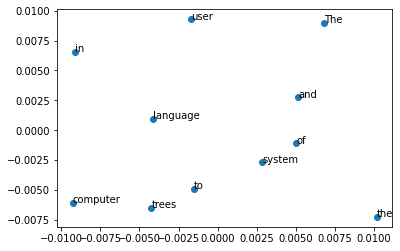

In [37]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Obtenemos las representaciones de todas las palabras de nuestro Corpus
X = model[model.wv.vocab]

# Reducimos dimensionalidad
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Mostramos la distribución de nuestras palabras
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Como hemos visto durante el ejercicio, es muy **complicado** poder llevar a cabo **una buena visualización** de la representación de las palabras de nuestro Corpus, debido principalmente a **dos razones**: las **limitaciones** en cuanto a **tiempo de entrenamiento** por motivos didácticos (estamos empleando un **Corpus pequeño**) y la **forma** en la que llevamos a cabo la **visualización**. Para hacernos una mejor idea de la **potencia del algoritmo word2Vec** vamos a inspeccionar un recurso que va a eliminar nuestras dos principales limitaciones:

https://projector.tensorflow.org/

Este recurso nos brinda entrenamientos de **word2Vec** con **Corpus mucho más grandes** del que hemos empleado a lo largo del ejercicio. Además nos proporciona **herramientas de visualización interactiva** y nos deja escoger entre **varios mecanísmos de reducción de la dimensionalidad**. Puedes navegar sobre la nube de puntos e ir viendo que palabras están mas cercanas a otras. Adicionalmente, en el panel derecho, nos ofrece una **herramienta de búsqueda** de lo más potente. Vamos a experimentar un poco con ella:

- Busca la palabra ***one*** y **analiza las palabras más cercanas a esta** (a partir de la lista que aparece debajo de la búsqueda realizada. **Visualiza gráficamente el entorno cercano** a la palabra. ¿Que palabras encuentras cerca?

- Lleva a cabo el **mismo procedimiento** con la palabra ***pink*** y extrae conclusiones.

- Por último, **busca la palabra *python***. ¿Cuál es la **palabra más cercana** a Python? Navega por el entorno cercano de puntos e **identifica** algunas **palabras** que tengan que ver con *python* **en el ámbito que nos ocupa**.

- Para concluir vuelve a recordar mentalmente la representación *one-hot encoding* y discute las **ventajas de *word embeddings***.



-------------------------------------------------

Ahora que ya conocemos cues es la mejor forma de respresentar las palabras de un Corpus, ya estamos a disposición de llevar a cabo una **tarea de clasificación de texto**. Más concretamente, vamos a abordar un problema de clasificación de sentimientos a partir del set de datos [IMDB](https://keras.io/api/datasets/imdb/) que contiene **25000 reviews de películas**, catalogadas según sentimiento **positivo/negativo**. Lee la documentación para comprender como nos presentan el set de datos una vez lo importamos. Comenta las instrucciones que involucran los parámetros ```num_words``` y ```maxlen```. ¿Cuál de estos dos parámetros repercutirá sobre nuestro Corpus?¿De que forma lo hará?.  Realiza varias ejecuciones hasta tener claro que ocurre cuando damos con una review que tiene menos palabras que el parámetro ```max_review_length```.

In [45]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np

# ???
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# ???
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# ???
rev_idx = np.random.randint(0, X_train.shape[0])
print(X_train[rev_idx])

# Mostrar por pantalla las dimensiones de los subconjuntos de datos de train y test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

De la visualización de un ejemplo de review aleatoria anterior, podemos observar que cuando traemos el set de datos, **no estamos importando las palabras** de las reviews si no un índice. Si queremos **visualizar la descripción** de una review deberemos llevar a cabo un proceso de **reconstrucción** de la misma mediante el método ```get_word_index``` que incluye los datasets de texto que importamos desde Keras. Analiza y ejecuta la celda inferior para mostrar el texto de la review aleatoria a la que hemos accedido anteriormente. ¿Con que intención establecemos el símbolo #?

In [39]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[rev_idx]] )
print(decoded) 

1641221/1641221 [==============================] - 0s 0us/step
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # it's the nature of # to try to # on # success here we have a movie taking elements from the earlier # # and # # in a # town the village # believe that vampires in the shape of # have been the cause of recent deaths of # victims even though shot at universal and at the # # it's a poverty row feature it's not fair to compare it with those earlier more # made and superior films br br from the familiar and exciting chilling music of the main titles which must have been by # # through the # but well done opening sequence we # the arrival of # # fay # and # # to give us a good # mystery film unfortunately it doesn't happen that's the disappointment br br we get little more than the formulaic elements of such films but with slow pacing low budget n

**EJERCICIO 3.** Una vez hemos importado y comprendido la naturaleza del set de datos con el que vamos a trabajar, vamos a implementar un **MLP** con el objetivo de establecer una metodología simple que nos ofrezca un ***performance baseline***. En este sentido, debes implementar un MLP con **dos *hidden layers*** de **16 y 4 neuronas**, respectivamente. Añade una capa de **```Dropout```** con **```p_drop=0.3```** tras cada una de estas *hidden layers*. Recuerda que la codificación de nuestro texto a la entrada debe ser un *word embedding*. Para ello vamos a entrenar una primera capa que extraiga la mejor representación numérica (en vectores) de nuestras palabras en base a la tarea que queremos resolver, i.e. clasificación de sentimiento positivo vs negativo. Para ello, emplea la **capa ```Embedding```** de Keras, tras analizar exhaustuvamente sus parámetros de entrada. Deberás especificar los parámetros **```input_dim```**, **```output_dim```** e **```input_length```** debidamente. Emplea una **dimensionalidad del vector de embedding** de **32**. Para entrenar el MLP utiliza la **función de pérdidas más adecuada** según la naturaleza del problema al que nos estamos enfrentando. Lleva a cabo el entrenamiento mediante el **optimizador 'Adam'** con sus parámetros por defecto durante **20 épocas** empleando un **```batch_size=64```** y un **```validation_split=0.05```**.

In [87]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
# Establecemos semilla para garantizar reproducibilidad de resultados
numpy.random.seed(42)

# Creamos la arquitectura MLP
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim = 5000,output_dim = 32,input_length=500))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.05)



Epoch 1/20
372/372 [==============================] - 17s 40ms/step - loss: 0.6267 - accuracy: 0.6189 - val_loss: 0.3867 - val_accuracy: 0.8376
Epoch 2/20
372/372 [==============================] - 15s 39ms/step - loss: 0.3643 - accuracy: 0.8698 - val_loss: 0.3163 - val_accuracy: 0.8672
Epoch 3/20
372/372 [==============================] - 17s 46ms/step - loss: 0.2514 - accuracy: 0.9230 - val_loss: 0.3347 - val_accuracy: 0.8648
Epoch 4/20
372/372 [==============================] - 15s 39ms/step - loss: 0.1951 - accuracy: 0.9419 - val_loss: 0.3868 - val_accuracy: 0.8544
Epoch 5/20
372/372 [==============================] - 15s 40ms/step - loss: 0.1630 - accuracy: 0.9523 - val_loss: 0.4331 - val_accuracy: 0.8576
Epoch 6/20
372/372 [==============================] - 15s 39ms/step - loss: 0.1268 - accuracy: 0.9640 - val_loss: 0.5336 - val_accuracy: 0.8512
Epoch 7/20
372/372 [==============================] - 15s 39ms/step - loss: 0.1130 - accuracy: 0.9664 - val_loss: 0.5678 - val_accuracy:

In [88]:
# Evaluamos el modelo
predictions = model.predict(x=X_test, batch_size=None)
# Obtenemos el report (requiere etiquetas y predicciones categóricas)
print(classification_report(y_test,np.argmax(predictions, axis=1)))

782/782 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tal y como hemos visto en el apartado teórico y se evidencia de la ejecución anterior, un **MLP no es** la **arquitectura** de red neuronal **óptima** para abordar una **tarea de NLP**. Básicamente esto es debido a la **pérdida de la secuencialidad lógica** que sigue una sentencia de texto. Al igual que ocurría en el campo de la visión por computador con las CNNs, existe una arquitectura de red capaz de codificar las dependencias propias de una secuencia de texto. Este tipo de red, recibe el nombre de **red neuronal recurrente (RNN)**, y más concretamente, para el análisis de texto se emplean RNNs que hacen uso de **unidades Long-short term memory (LSTM)**. En este sentido, vamos a modificar la red anterior sustituyendo las dos *hidden layers* del perceptrón multicapa por una **capa ```LSTM```** de **100 unidades**. Lee con atención la [documentación](https://keras.io/api/layers/recurrent_layers/lstm/) relativa a este tipo de capa. Lleva a cabo el mismo proceso de entrenamiento que anteriormente pero ahora durante **3 épocas**. ¿Que conclusiones se pueden extraer de este nuevo entrenamiento?

In [89]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten

# Establecemos semilla para garantizar reproducibilidad de resultados
numpy.random.seed(42)

# Creamos la arquitectura LSTM
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim = 5000,output_dim = 32,input_length=500))
#model.add(Flatten())
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.05)



Epoch 1/3
372/372 [==============================] - 331s 880ms/step - loss: 0.4828 - accuracy: 0.7583 - val_loss: 0.3344 - val_accuracy: 0.8576
Epoch 2/3
372/372 [==============================] - 330s 887ms/step - loss: 0.3659 - accuracy: 0.8467 - val_loss: 0.4046 - val_accuracy: 0.8352
Epoch 3/3
372/372 [==============================] - 328s 883ms/step - loss: 0.2921 - accuracy: 0.8792 - val_loss: 0.4310 - val_accuracy: 0.8008


In [90]:
# Evaluamos el modelo
predictions = model.predict(x=X_test, batch_size=None)
# Obtenemos el report (requiere etiquetas y predicciones categóricas)
print(classification_report(y_test,np.argmax(predictions, axis=1)))

782/782 [==============================] - 109s 138ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------------------------

**EJERCICIO 4.** En esta última actividad, vamos a aprender a generar texto sintético a partir de un modelo probabilístico generado mediante una red neuronal recurrente y un muestreo estocástico con el objetivo de crear frases lo más realistas posibles.

Para ello lo primero que debemos hacer es **montar** la unidad de **Google Drive** y **leer** el archivo **quijote.txt** previamente subido a una carpeta en nuestra unidad. Posteriormente, lo que debemos hacer es construir el conjunto de datos a partir de dicho fichero. Estableceremos una **ventana deslizante** a través de la cuál iremos **enventanando texto** y generando nuestras muestras del conjunto de datos. Cada una de estás muestras tendrá asignado como ***ground truth*** el **carácter inmediatamente posterior** a dicha ventana de texto. Con este objetivo podremos construir un modelo que dado un segmento de oración lleve a cabo la predicción del siguiente carácter. Realiza diversas **pruebas** con las **sentencias ```print```** de la siguiente celda de código hasta que comprendas perfectamente la creación del dataset.

In [69]:
# Montamos nuestras unidad de GDrive
from google.colab import drive
drive.mount('/content/drive/')

# Ruta al fichero de texto del Quijote
colab_path_quijote =  '/content/drive/My Drive/Curso Deep Learning UPV/Sesion 6/quijote.txt'
# Abrimos el fichero del Quijote y leemos todo el texto, reemplazando algunos caracteres especiales
with open(colab_path_quijote,'r') as f:
    replace_chars = {'\n':' ',
                    '\xad':'',
                    '±':'',
                    '³':'',
                    'º':'',
                    '¼':'',
                    'â':'a',
                    'ã':'a',
                    '©':''
    }
    corpus = f.read().lower()
    for old, new in replace_chars.items():
        corpus = corpus.replace(old,new)

print(corpus)

# Creamos el set de datos a partir de un tamaño de ventana sobre el texto y fijando como GT la siguiente letra
# Es importante destacar que fijamos una ventana deslizante en pasos step

maxlen = 60 # Establecemos el tamaño de ventana
step = 3 # Paso con el que deslizamos la ventana sobre el texto

sentences = []
next_chars = []

for i in range(0,len(corpus) - maxlen,step):
    sentences.append(corpus[i: i + maxlen])
    next_chars.append(corpus[i + maxlen])

print(sentences[0])
print(next_chars[0])

Mounted at /content/drive/
el ingenioso hidalgo don quijote de la mancha  miguel de cervantes saavedra       capítulo primero       que trata de la condición y ejercicio del famoso hidalgo d. quijote de la       mancha       en un lugar de la mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. el resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. frisaba la edad de nuestro hidalgo con los 

Para obtener el **número de clases** que definen nuestro problema de clasificación, debemos **conocer el número de carácteres distintos que componen el texto del Quijote**, para ello debemos ejecutar el código contenido en la siguiente celda. Asegurate que entiendes las instrucciones que se llevan a cabo, ayúdate de la documentación si es necesario.

In [70]:
# Extraemos los carácteres únicos de todo el corpus, para saber el número de clases que caracterizará nuestro problema
unique_chars = sorted(list(set(corpus)))
char_indices = {char : i for i,char in enumerate(unique_chars) }
print(char_indices)

{' ': 0, '!': 1, '"': 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'x': 33, 'y': 34, 'z': 35, '¡': 36, '¿': 37, 'á': 38, 'é': 39, 'í': 40, 'ñ': 41, 'ó': 42, 'ú': 43, 'ü': 44}


Sabiendo que el **número de carácteres** está **limitado a 45** (tal y como observamos de la ejecución anterior), podemos emplear **one-hot encoding** para llevar a cabo el entrenamiento. Ejecuta la siguiente celda para realizar el mapeo y visualiza algunos ejemplos.

In [71]:
import numpy as np

# Vectorizacion (one hot encoding)
x = np.zeros((len(sentences), maxlen, len(unique_chars)), dtype=np.bool) # cada secuencia, hot encoded
y = np.zeros((len(sentences), len(unique_chars)), dtype=np.bool) # para cada secuencia, el siguiente caracter hot encoded
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i,t,char_indices[char]] = 1
    y[i,char_indices[next_chars[i]]] = 1


print(x.shape)
print(y.shape)
print(x[0])
print(y[0])

<ipython-input-71-382dfc67f611>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), maxlen, len(unique_chars)), dtype=np.bool) # cada secuencia, hot encoded
<ipython-input-71-382dfc67f611>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(unique_chars)), dtype=np.bool) # para cada secuenci

(103718, 60, 45)
(103718, 45)
[[False False False ... False False False]
 [False False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False]


Vamos a definir una arquitectura de red compuesta por **dos capas LSTM**, de **256 y 64 neuronas**, respectivamente. En la primera capa, estableceremos el parámetro de entrada **```return_sequences=True```**. Revisa la documentación para entender lo que proporciona el activar este parámetro. Para fijar el **```input_shape``` de la red**, recuerda que **cada muestra** viene definida por una **matriz** de **```maxlen``` filas** y el **número máximo de carácteres como columnas**. Compila la red neuronal recurrente estableciendo la **función de pérdidas adecuada** al problema y empleando **```'rmsprop'```** como **optimizador**. Entrena la solución durante **30 épocas** empleando un **```batch_size=128```**.

**Nota:** Este último entrenamiento de la prtáctica ronda las 4 horas. Será necesario dejarlo ejecutando y es muy recomendable almacenar el modelo haciendo uso de la función **```model.save```** de Keras

In [86]:
# Modelo con LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Cuando se concatenan LSTM, parametro return_sequences=True excepto en la ultima
# Las capas intermedias pasan toda la secuencia de outputs, pero la ultima solo pasa el ultimo output
model = Sequential()
model.add(Embedding(103718, 45, input_length=60))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Obtener el sumario
model.summary()

TypeError: ignored

In [82]:
Ç# Entrenar el modelo
history = model.fit(x, y, epochs=30, batch_size=128)

#Almacenar el modelo en Drive
#???

Epoch 1/30


ValueError: ignored

Por último, vamos a llevar a cabo la **generación de nuevo texto** a partir de una **secuencia de inicio** escogida al azar y el **modelo que acabamos de entrenar**. Para ello, lo primero que haremos es definir una función que seleccione el siguiente carácter a partir de la distribución de probabilidades de salida de la red neuronal (salida de la capa softmax). Concretamente, definimos un método que dado un parámetro de temperatura haga esta asignación de manera más entrópica o más estocástica.

In [ ]:
import numpy as np

def transform_distribution(predictions, temperature=0.5):
    predictions = np.array(predictions).astype('float64')
    # temperaturas altas: mas entropia (mas aleatorio)
    # temperaturas bajas: menos estocasticidad (mas deterministico)
    predictions = np.log(predictions) / temperature
    exp_predictions = np.exp(predictions)
    predictions = exp_predictions / np.sum(exp_predictions) # asegurarse que los valores suman 1 (probabilidad)
    probs = np.random.multinomial(1, predictions, 1)
    return np.argmax(probs)

Finalmente, definimos la el script que a partir de una semilla de texto va generando nuevo texto. Analiza detenidamente el código y ejecútalo para observar como podemos generar sintéticamente texto a partir de un modelo de red neuronal recurrente. ¿Tiene **sentido el texto** que se ha generado?¿Como crees que podriamos **mejorar la calidad** del texto generado?


In [ ]:
import random
# generar secuencias arbitrarias de texto
predict_length = 400
temperature = 0.8
# random text seed
start_index = random.randint(0,len(corpus) - maxlen - 1)
input_text = corpus[start_index: start_index + maxlen]
print('Seed: ' + input_text + '\n')
generated_text = input_text

for i in range(predict_length):
    sampled = np.zeros((1, maxlen, len(unique_chars)))
    for t, char in enumerate(input_text):
        sampled[0,t,char_indices[char]] = 1.
    
    prediction = model.predict(sampled, verbose=0)[0]
    next_index = transform_distribution(prediction,temperature)
    next_char = unique_chars[next_index]
    
    #pegar el nuevo texto
    input_text += next_char
    generated_text += next_char
    input_text = input_text[1:]

print('Generated text: ' + generated_text)